# Quiz: Data Wrangling and Visualization

Kuis ini merupakan bagian dari proses penilaian *Algoritma Academy*. Selamat Anda sudah menyelesaikan materi *Data Wrangling and Visualization*! Kami akan melakukan penilaian berupa kuis untuk menguji materi yang sudah dipelajari. Pengerjaan kuis diharapkan dapat dilakukan di dalam kelas, silakan hubungi tim pengajar kami jika Anda melewatkan kesempatan untuk mengambilnya di kelas.

In [311]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [312]:
pd.__version__

'1.4.3'

> **Perhatian**: Mohon pastikan bahwa versi `pandas` yang Anda gunakan merupakan versi 1.3.4 


# Data Preparation

Pada kuis ini, data yang akan kita gunakan adalah **ringkasan data transaksi** sebuah toko ritel online yang diperoleh dari UCI Machine Learning [repository](https://archive.ics.uci.edu/ml/datasets/online+retail). Semua transaksi terjadi di akhir tahun 2010 sampai akhir tahun 2011 untuk ritel online non-toko yang berbasis dan terdaftar di UK: 

- `InvoiceNo`: ID invoice unik
- `TotalPrice`: total harga dari suatu transaksi
- `UniqueItem`: banyak item unik yang dibeli pada tiap transaksi/invoice
- `CustomerID`: kode identifikasi customer >> category
- `Country`: negara asal customer
- `InvoiceDate`: tanggal transaksi

In [313]:
invoice = pd.read_csv('data_input/retail_invoice.csv',index_col='InvoiceNo')
invoice.head()

,UniqueItem,TotalPrice,CustomerID,Country,InvoiceDate
InvoiceNo,,,,,
536365,7,139.12,17850.0,United Kingdom,2010-12-01 08:26:00
536366,2,22.20,17850.0,United Kingdom,2010-12-01 08:28:00
536367,12,278.73,13047.0,United Kingdom,2010-12-01 08:34:00
536368,4,70.05,13047.0,United Kingdom,2010-12-01 08:34:00
536369,1,17.85,13047.0,United Kingdom,2010-12-01 08:35:00


Sebelum melangkah lebih jauh, periksa tipe data menggunakan `dtypes` dan pastikan semua kolom telah disimpan dalam tipe data yang benar!

In [314]:
## Your code here

invoice["Country"] = invoice["Country"].astype("object")

In [315]:
invoice["CustomerID"] = invoice["CustomerID"].astype("category")

In [316]:
invoice["InvoiceDate"] = invoice["InvoiceDate"].astype("datetime64")

In [317]:
invoice.dtypes

UniqueItem              int64
TotalPrice            float64
CustomerID           category
Country                object
InvoiceDate    datetime64[ns]
dtype: object

In [318]:
invoice.nunique()

UniqueItem      259
TotalPrice     8042
CustomerID     2931
Country          37
InvoiceDate    9519
dtype: int64

Perusahaan sedang berencana untuk melakukan ekspansi/perluasan dan Anda diminta untuk mengamati pasar luar negeri. Menggunakan teknik subsetting yang telah Anda pelajari sebelumnya, lakukan subsetting pada data untuk mendapatkan  **tansaksi dari seluruh negara (`Country`) di luar United Kingdom**  dan simpanlah hasilnya ke dalam variabel bernama **`invoice_int`**.

In [319]:
## Your code here - subsetting pada data

invoice_int = invoice[invoice['Country'] != 'United Kingdom']
invoice_int

,UniqueItem,TotalPrice,CustomerID,Country,InvoiceDate
InvoiceNo,,,,,
536370,20,855.86,12583.0,France,2010-12-01 08:45:00
536389,14,358.25,12431.0,Australia,2010-12-01 10:03:00
536403,2,192.60,12791.0,Netherlands,2010-12-01 11:27:00
536527,15,261.48,12662.0,Germany,2010-12-01 13:04:00
536532,73,1919.14,12433.0,Norway,2010-12-01 13:24:00
...,...,...,...,...,...
558045,31,634.74,12615.0,France,2011-06-24 13:35:00
558046,30,542.20,NaN,EIRE,2011-06-24 13:47:00
558047,1,542.20,NaN,EIRE,2011-06-24 13:51:00


In [320]:
invoice_int.nunique()

UniqueItem      91
TotalPrice     835
CustomerID     279
Country         36
InvoiceDate    842
dtype: int64

In [321]:
invoice.nunique()

UniqueItem      259
TotalPrice     8042
CustomerID     2931
Country          37
InvoiceDate    9519
dtype: int64

## Analisis Pendapatan
 
Negara yang memiliki total pendapatan terbesar akan menjadi target pasar perusahaan Anda. Oleh karena itu, menggunakan data `invoice_int`, buatlah sebuah bar chart yang menampilkan **top 5** negara dengan **total** pendapatan (`TotalPrice`) paling besar!

*Petunjuk:*
- Lakukan agregasi menggunakan `groupby` untuk mendapatkan total (`sum`) pendapatan (`TotalPrice`) dari setiap negara dan subset hasilnya untuk menghasilkan dataframe berisi 5 negara dengan nilai pendapatan paling besar.
- Pasangkan dataframe yang Anda peroleh dengan method `.plot()` untuk menampilkan diagram batang (bar chart).

In [322]:
## Your code here
# sort values ascending = false

total_price = invoice_int.groupby("Country").sum()
total_price_sorted = total_price.sort_values(by="TotalPrice", ascending=False)
total_price_sorted.head()

,UniqueItem,TotalPrice
Country,,
Netherlands,1139,125816.11
EIRE,2915,111514.90
Germany,3945,106223.19
France,3571,89619.32
Australia,629,79806.79


In [323]:
# with crosstab

pd.crosstab(
    index=invoice_int['Country'], 
    columns='Total Price', 
    values=invoice_int['TotalPrice'],
    aggfunc='sum'
).sort_values(by='Total Price', ascending=False).head()

col_0,Total Price
Country,
Netherlands,125816.11
EIRE,111514.90
Germany,106223.19
France,89619.32
Australia,79806.79


<AxesSubplot:ylabel='Country'>

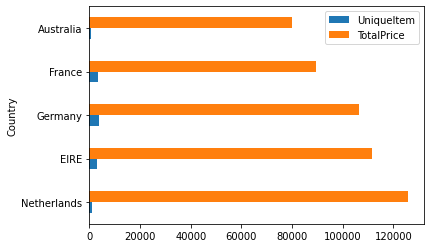

In [324]:
total_price_sorted.head().plot(kind = 'barh')

1. Saat membuat diagram batang (bar chart), kita juga harus mempertimbangkan urutan batangnya. Mengurutkan batang dengan urutan yang benar mengurangi beban pembaca untuk menyimpulkan perbandingannya. Menurut Anda, berdasarkan nilai apakah sebaiknya pengurutan diagram batang pada kasus di atas dilakukan?
    - [ ] by Country: `sort_values('Country', ascending = False).plot(kind='bar')`
    - [ ] by Country: `sort_values('Country').plot(kind='barh')`
    - [x] by Value: `sort_values('TotalPrice', ascending=False).plot(kind='bar')`
    - [ ] by Value: `sort_values('TotalPrice').plot()`

2. Berdasarkan diagram yang telah dibuat, manakah di antara negara berikut yang **bukan** merupakan top 5 (berdasarkan total pendapatan) pasar terbesar di luar United Kingdom?
    - [ ] Netherland
    - [ ] EIRE
    - [ ] Germany
    - [x] Spain 

## Replikasi Plot

Cara yang umum untuk memeriksa data secara statistik adalah dengan menggunakan boxplot, alat visualisasi praktis yang menyediakan lima ringkasan statistik untuk data Anda. Boxplot di bawah ini menampilkan perbandingan ringkasan bulanan dari setiap total pendapatan pasar luar negeri;

- Setiap poin data mewakili total pendapatan dari semua negara (`TotalPrice`)
- Sumbu x dan y masing-masing mewakili periode bulan dan total pendapatan bulanan.

![](assets/task2.png)

3. Berdasarkan boxplot di atas, manakah dari pernyataan berikut yang **BENAR**?

    - [ ] Median dari total pendapatan tertinggi di bulan Januari 2011 adalah sekitar 18,000 USD
    - [ ] Di tahun 2011, nilai median dari total pendapatan di bulan Februari lebih tinggi dari bulan Mei
    - [ ] Nilai median dari total pendapatan meraih angka tertinggi di bulan Mei 2011.
    - [x] Di tahun 2011, dapat dipastikan bahwa terdapat lebih banyak nilai outlier pada bulan April dibandingkan bulan Juni

   Opsi jawaban Bahasa Inggris:

    - [ ] The highest median of total market revenue in January 2011 was around 18,000 USD
    - [ ] In 2011, the median of total monthly market revenue in February was higher than May
    - [ ] The median revenue appeared to be highest in May 2011.
    - [ ] In 2011, it is certain that there were more countries that happen to be outliers in April than June
    
    
4. Cobalah untuk membuat ulang boxplot di atas dengan mengisi bagian kode yang hilang di bawah ini:

```
import numpy as np

invoice_monthly = invoice_int.copy()
invoice_monthly['InvoiceMonth'] = invoice_monthly['InvoiceDate'].dt.to_period('M')

invoice_monthly_agg = invoice_monthly.\
groupby(_______).\
agg({'TotalPrice': 'sum'}).\
replace(0, np.nan) # mengubah nilai 0 menjadi NaN

invoice_monthly_agg.\
boxplot(column = _______, by=_______)
```

   - [ ] `['Country']`, `'TotalPrice'`, `'Country'`
   - [ ] `['InvoiceMonth']`, `'TotalPrice'`, `'InvoiceMonth'`
   - [x] `['Country','InvoiceMonth']`, `'TotalPrice'`, `'InvoiceMonth'`
   - [ ] `['InvoiceMonth','Country']`, `'InvoiceMonth'`, `'TotalPrice'`

In [325]:
## Your code here
invoice_monthly = invoice_int.copy()

In [326]:
# ubah to yearmonth
invoice_monthly['InvoiceMonth'] = invoice_monthly['InvoiceDate'].dt.to_period('M')

<AxesSubplot:title={'center':'TotalPrice'}, xlabel='InvoiceMonth'>

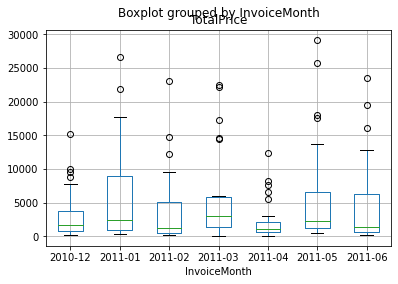

In [327]:
invoice_monthly_agg = invoice_monthly.groupby(["Country","InvoiceMonth"]).agg({'TotalPrice': 'sum'}
                                   ).replace(0, np.nan) # mengubah nilai 0 menjadi NaN

invoice_monthly_agg.boxplot(column = "TotalPrice", by="InvoiceMonth")

## Analisa Outlier

Berdasarkan boxplot yang sebelumnya, kita menemukan bahwa pada Juni 2011 terdapat 3 negara dengan `TotalPrice` yang sangat tinggi (outlier). Dengan mengisi bagian kode yang hilang di bawah ini, Anda dapat mengidentifikasi outlier tersebut dengan melakukan subsetting pada `invoice_monthly_agg` berdasarkan nilai upper wishker/batas atas pada boxplot:

```
june_invoice = invoice_monthly_agg.xs(key = _______, level= _______)
june_outliers = june_invoice[june_invoice['TotalPrice'] > 13000]

june_outliers
```

5. Manakah negara yang **TIDAK** termasuk di dalam data frame `june_outliers`?
   - [x] Germany
   - [ ] France
   - [ ] Australia
   - [ ] EIRE

In [328]:
invoice_monthly_agg

TotalPrice
Country              InvoiceMonth            
Australia            2010-12          1032.85
                     2011-01          9017.71
                     2011-02         14695.42
                     2011-03         17223.99
                     2011-04           771.60
...                                       ...
USA                  2011-04           383.95
United Arab Emirates 2011-02           889.24
Unspecified          2011-04           299.10
                     2011-05          1055.87
                     2011-06           185.78

[157 rows x 1 columns]

In [329]:
## Your code here:

june_invoice = invoice_monthly_agg.xs(key = "2011-06", level="InvoiceMonth" )
june_outliers = june_invoice[june_invoice['TotalPrice'] > 13000]

june_outliers

,TotalPrice
Country,
Australia,23426.81
EIRE,19551.94
France,16012.89


Anda diminta untuk melakukan analisa jumlah pendapatan masing-masing negara per kuartal yang terdapat pada data `june_outliers` . Untuk menganalisanya, Anda diminta unruk membuat sebuah visualisasi. Salin kode di bawah ini untuk menyiapkan data untuk membuat visualisasinya:
```
invoice_q = invoice_int.copy()
invoice_q['Quarter'] = invoice_q['InvoiceDate'].dt.to_period('Q')
invoice_topq = invoice_q.groupby(['Country','Quarter']).\
                 agg({'TotalPrice' : 'sum'}).\
                 loc[june_outliers.axes[0],]
invoice_topq
```
Perlu diperhatikan : pembacaan plot dilakukan dari **kiri ke kanan** atau **dari atas ke bawah**

1. Manakah di antara kode berikut yang menunjukkan cara paling efisien untuk membuat **grouped bar chart** yang membandingkan pertumbuhan pendapatan triwulanan (quarter) dari tiap negara pada data `invoice_topq` secara terurut dari periode triwulan terlama hingga terbaru?    
    - [ ] `invoice_topq.plot(kind='bar')`
    - [ ] `invoice_topq.unstack().plot(kind = 'bar',stacked=True)`
    - [x] `invoice_topq.unstack(level = 'Country').plot(kind='barh')`
    - [ ] `invoice_topq.unstack(level = 'Country').plot(kind='bar')`

In [336]:
invoice_q = invoice_int.copy()
invoice_q['Quarter'] = invoice_q['InvoiceDate'].dt.to_period('Q')
invoice_topq = invoice_q.groupby(['Country','Quarter']).agg({'TotalPrice' : 'sum'}).loc[june_outliers.axes[0],]
invoice_topq

TotalPrice
Country   Quarter            
Australia 2010Q4      1032.85
          2011Q1     40937.12
          2011Q2     37836.82
EIRE      2010Q4     10033.26
          2011Q1     56350.44
          2011Q2     45131.20
France    2010Q4      9616.31
          2011Q1     40845.63
          2011Q2     39157.38

<AxesSubplot:xlabel='Country,Quarter'>

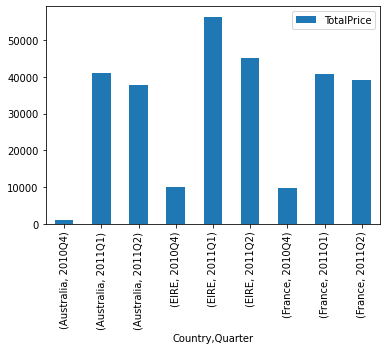

In [337]:
## Your code here:

invoice_topq.plot(kind='bar')

<AxesSubplot:xlabel='Country'>

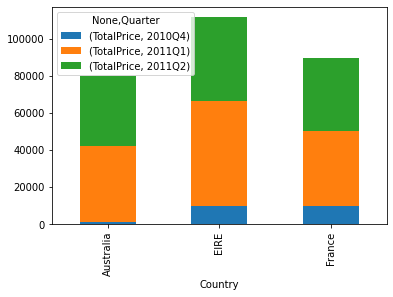

In [338]:
invoice_topq.unstack().plot(kind = 'bar',stacked=True)

<AxesSubplot:ylabel='Quarter'>

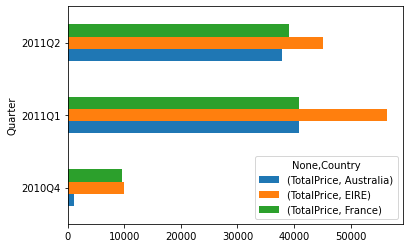

In [339]:
invoice_topq.unstack(level = 'Country').plot(kind='barh')

<AxesSubplot:xlabel='Quarter'>

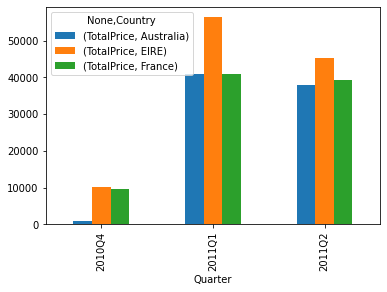

In [340]:
invoice_topq.unstack(level = 'Country').plot(kind='bar')